In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('winemag-data_first150k.csv',index_col=0)

In [84]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Univariate Analysis

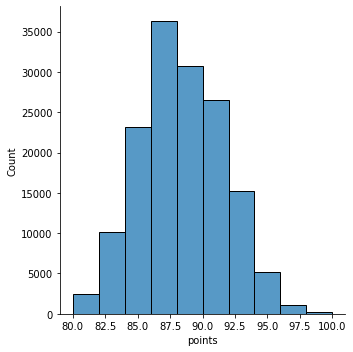

In [31]:
#plt.figure(figsize=(30,20))
sns.displot(df,x="points",bins=10);
plt.show()

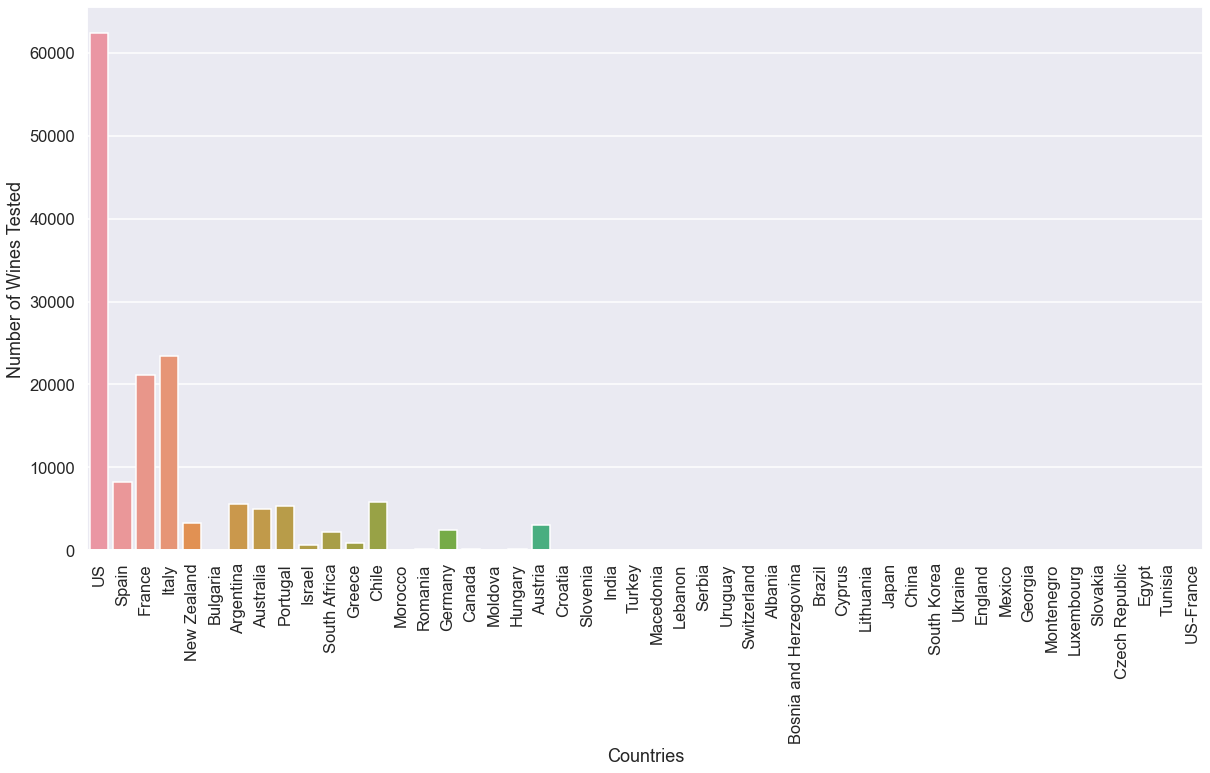

In [88]:
# How many wines were tested distributed by countries
plt.figure(figsize=(20,10))
g = sns.countplot(x='country',data=df)
plt.xticks(rotation=90)
g.set(xlabel="Countries",ylabel="Number of Wines Tested");

In [94]:
df.country.value_counts()[:5].index

Index(['US', 'Italy', 'France', 'Spain', 'Chile'], dtype='object')

## Wines tested from US was way more than any other country's wine so lets focus on top 5 countries

In [97]:
dft = df[df['country'].isin(df.country.value_counts()[:5].index)]

In [98]:
dft.country.value_counts()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

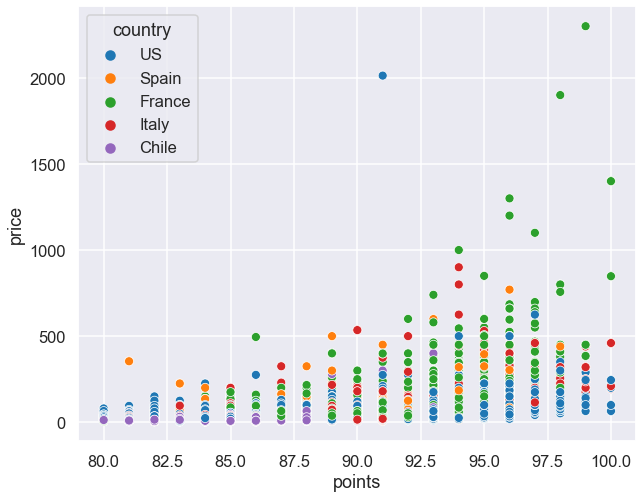

In [101]:
# Checking if expensive wines has more points in general
plt.figure(figsize=(10,8))
sns.scatterplot(x="points",y="price",data=dft,hue='country');

### Wow! France wines are generally expensive and are generally liked whereas Chile wines are not very expensive 

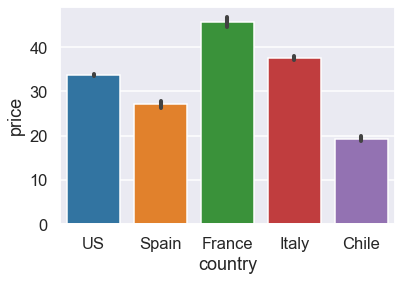

In [102]:
# Lets create some graph comparing countries in terms of wine price
sns.barplot(x="country",y="price",data=dft);

### France wines are more expensive followed by Italy, US, Spain, Chile

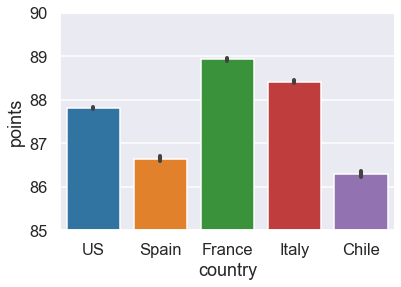

In [108]:
# Which country wines are more liked
g = sns.barplot(x="country",y="points",data=dft);
plt.ylim(85,90);

### France wines are more liked followed by Italy, US, Spain, Chile



#  Now analysing the wines from "type of wine" perspective

In [147]:
b = df.variety.value_counts(normalize=True)[:14]*100

In [149]:
my_wine_types = list(b.index)

In [150]:
my_wine_types

['Chardonnay',
 'Pinot Noir',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Sauvignon Blanc',
 'Syrah',
 'Riesling',
 'Merlot',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'White Blend',
 'Rosé']

In [154]:
df_wine = df[df['variety'].isin(my_wine_types)]

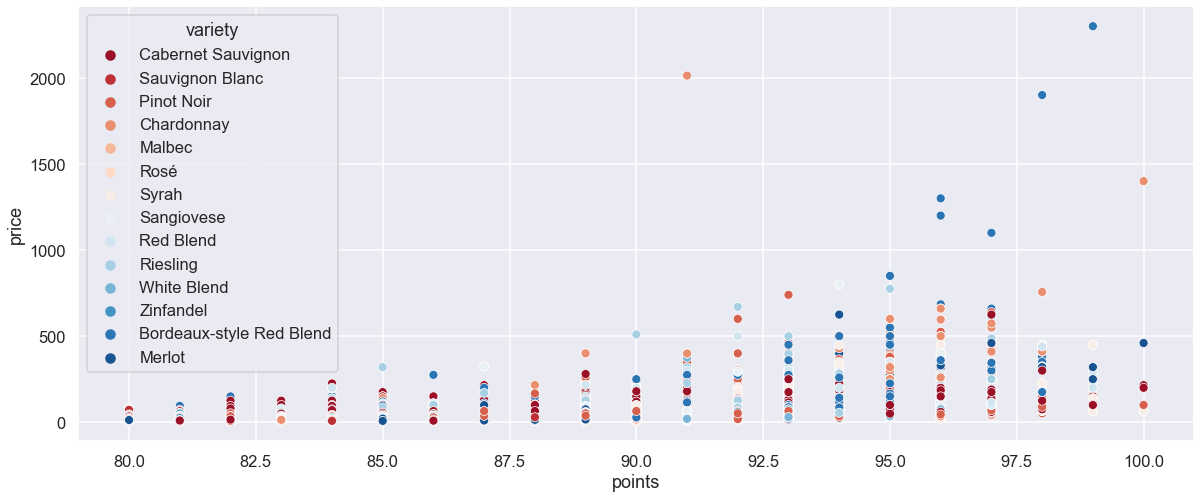

In [162]:
# Comparing wine points and wine price
plt.figure(figsize=(20,8))
sns.scatterplot(x="points",y="price",data=df_wine,hue='variety',palette="RdBu");

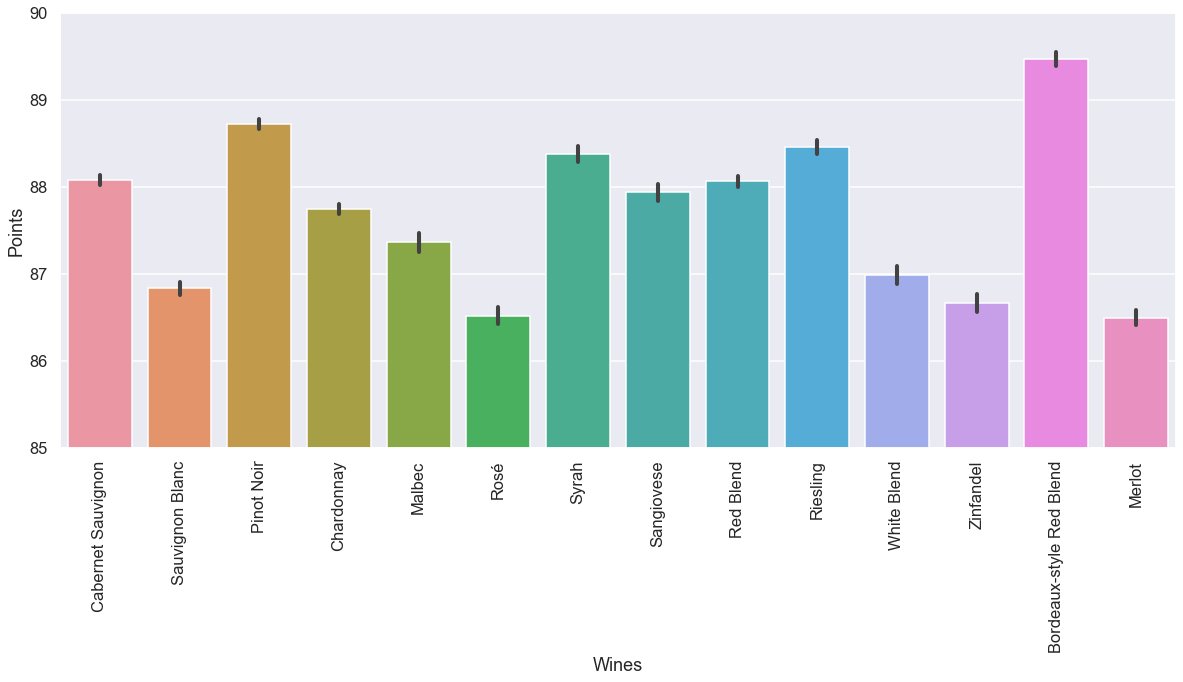

In [172]:
# Can't find anything interesting
plt.figure(figsize=(20,8))
g = sns.barplot(x="variety",y="points",data=df_wine)
g.set(xlabel="Wines",ylabel="Points")
plt.ylim(85,90)
plt.xticks(rotation=90);


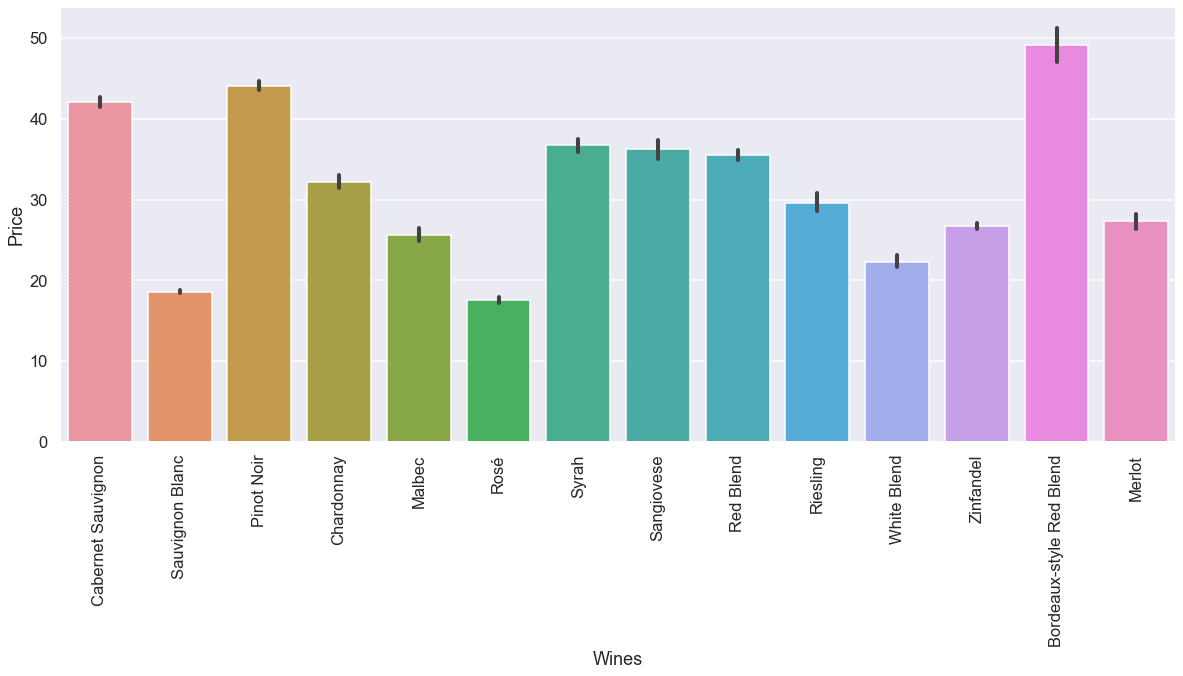

In [171]:
plt.figure(figsize=(20,8))
g = sns.barplot(x="variety",y="price",data=df_wine)
g.set(xlabel="Wines",ylabel="Price")

plt.xticks(rotation=90);

# Bordeaux-style Red Blend is expensive and also highly rated, Rose is less expensive and less rated 